# Import Libraries and load data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 20000)
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

from typing import List

np.random.seed(130301) # tạo seed để có thể reproduce kết quả

# remove Future Warning, typically Depreciation Warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('/content/train.csv', index_col=0)
test = pd.read_csv('/content/test.csv', index_col=0)

train_col = [i for i in train.columns if i != "SalePrice"]
test_col = [i for i in test.columns]

train_col == test_col

True

In [3]:
train

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice
Id                                                                                                     ...                                                                                              
1             60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN       0      2    2008        WD         Normal     208500
2             20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN       0      5    2007        WD         Normal     181500
3             60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN       0      9    2008        WD         Normal     223500
4             70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN       0      2    2006        WD        Abnorml     140000
5             60       RL         84.0    14260   Pave   NaN      IR1         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN       0     12    2008        WD         Normal     250000
...          ...      ...          ...      ...    ...   ...      ...         ...       ...       ...  ...      ...    ...    ...         ...     ...    ...     ...       ...            ...        ...
1456          60       RL         62.0     7917   Pave   NaN      Reg         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN       0      8    2007        WD         Normal     175000
1457          20       RL         85.0    13175   Pave   NaN      Reg         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN       0      2    2010        WD         Normal     210000
1458          70       RL         66.0     9042   Pave   NaN      Reg         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed    2500      5    2010        WD         Normal     266500
1459          20       RL         68.0     9717   Pave   NaN      Reg         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN       0      4    2010        WD         Normal     142125
1460          20       RL         75.0     9937   Pave   NaN      Reg         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN       0      6    2008        WD         Normal     147500

[1460 rows x 80 columns]

In [4]:
test

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition
Id                                                                                                     ...                                                                                                
1461          20       RH         80.0    11622   Pave   NaN      Reg         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv         NaN       0       6    2010        WD         Normal
1462          20       RL         81.0    14267   Pave   NaN      IR1         Lvl    AllPub    Corner  ...           0        0    NaN    NaN        Gar2   12500       6    2010        WD         Normal
1463          60       RL         74.0    13830   Pave   NaN      IR1         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv         NaN       0       3    2010        WD         Normal
1464          60       RL         78.0     9978   Pave   NaN      IR1         Lvl    AllPub    Inside  ...           0        0    NaN    NaN         NaN       0       6    2010        WD         Normal
1465         120       RL         43.0     5005   Pave   NaN      IR1         HLS    AllPub    Inside  ...         144        0    NaN    NaN         NaN       0       1    2010        WD         Normal
...          ...      ...          ...      ...    ...   ...      ...         ...       ...       ...  ...         ...      ...    ...    ...         ...     ...     ...     ...       ...            ...
2915         160       RM         21.0     1936   Pave   NaN      Reg         Lvl    AllPub    Inside  ...           0        0    NaN    NaN         NaN       0       6    2006        WD         Normal
2916         160       RM         21.0     1894   Pave   NaN      Reg         Lvl    AllPub    Inside  ...           0        0    NaN    NaN         NaN       0       4    2006        WD        Abnorml
2917          20       RL        160.0    20000   Pave   NaN      Reg         Lvl    AllPub    Inside  ...           0        0    NaN    NaN         NaN       0       9    2006        WD        Abnorml
2918          85       RL         62.0    10441   Pave   NaN      Reg         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv        Shed     700       7    2006        WD         Normal
2919          60       RL         74.0     9627   Pave   NaN      Reg         Lvl    AllPub    Inside  ...           0        0    NaN    NaN         NaN       0      11    2006        WD         Normal

[1459 rows x 79 columns]

# Simple EDA

In [5]:
numeric_ = train.select_dtypes(exclude=['object']).drop(['MSSubClass', 'SalePrice'], axis=1).copy()
numeric_.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], dtype='object')

In [6]:
disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

cont_num_var = [i for i in numeric_.columns if i not in disc_num_var]
cont_num_var

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

Distribution của các biến

<ipython-input-7-53d116a9ebc0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numeric_.loc[:,col].dropna(), kde=False)


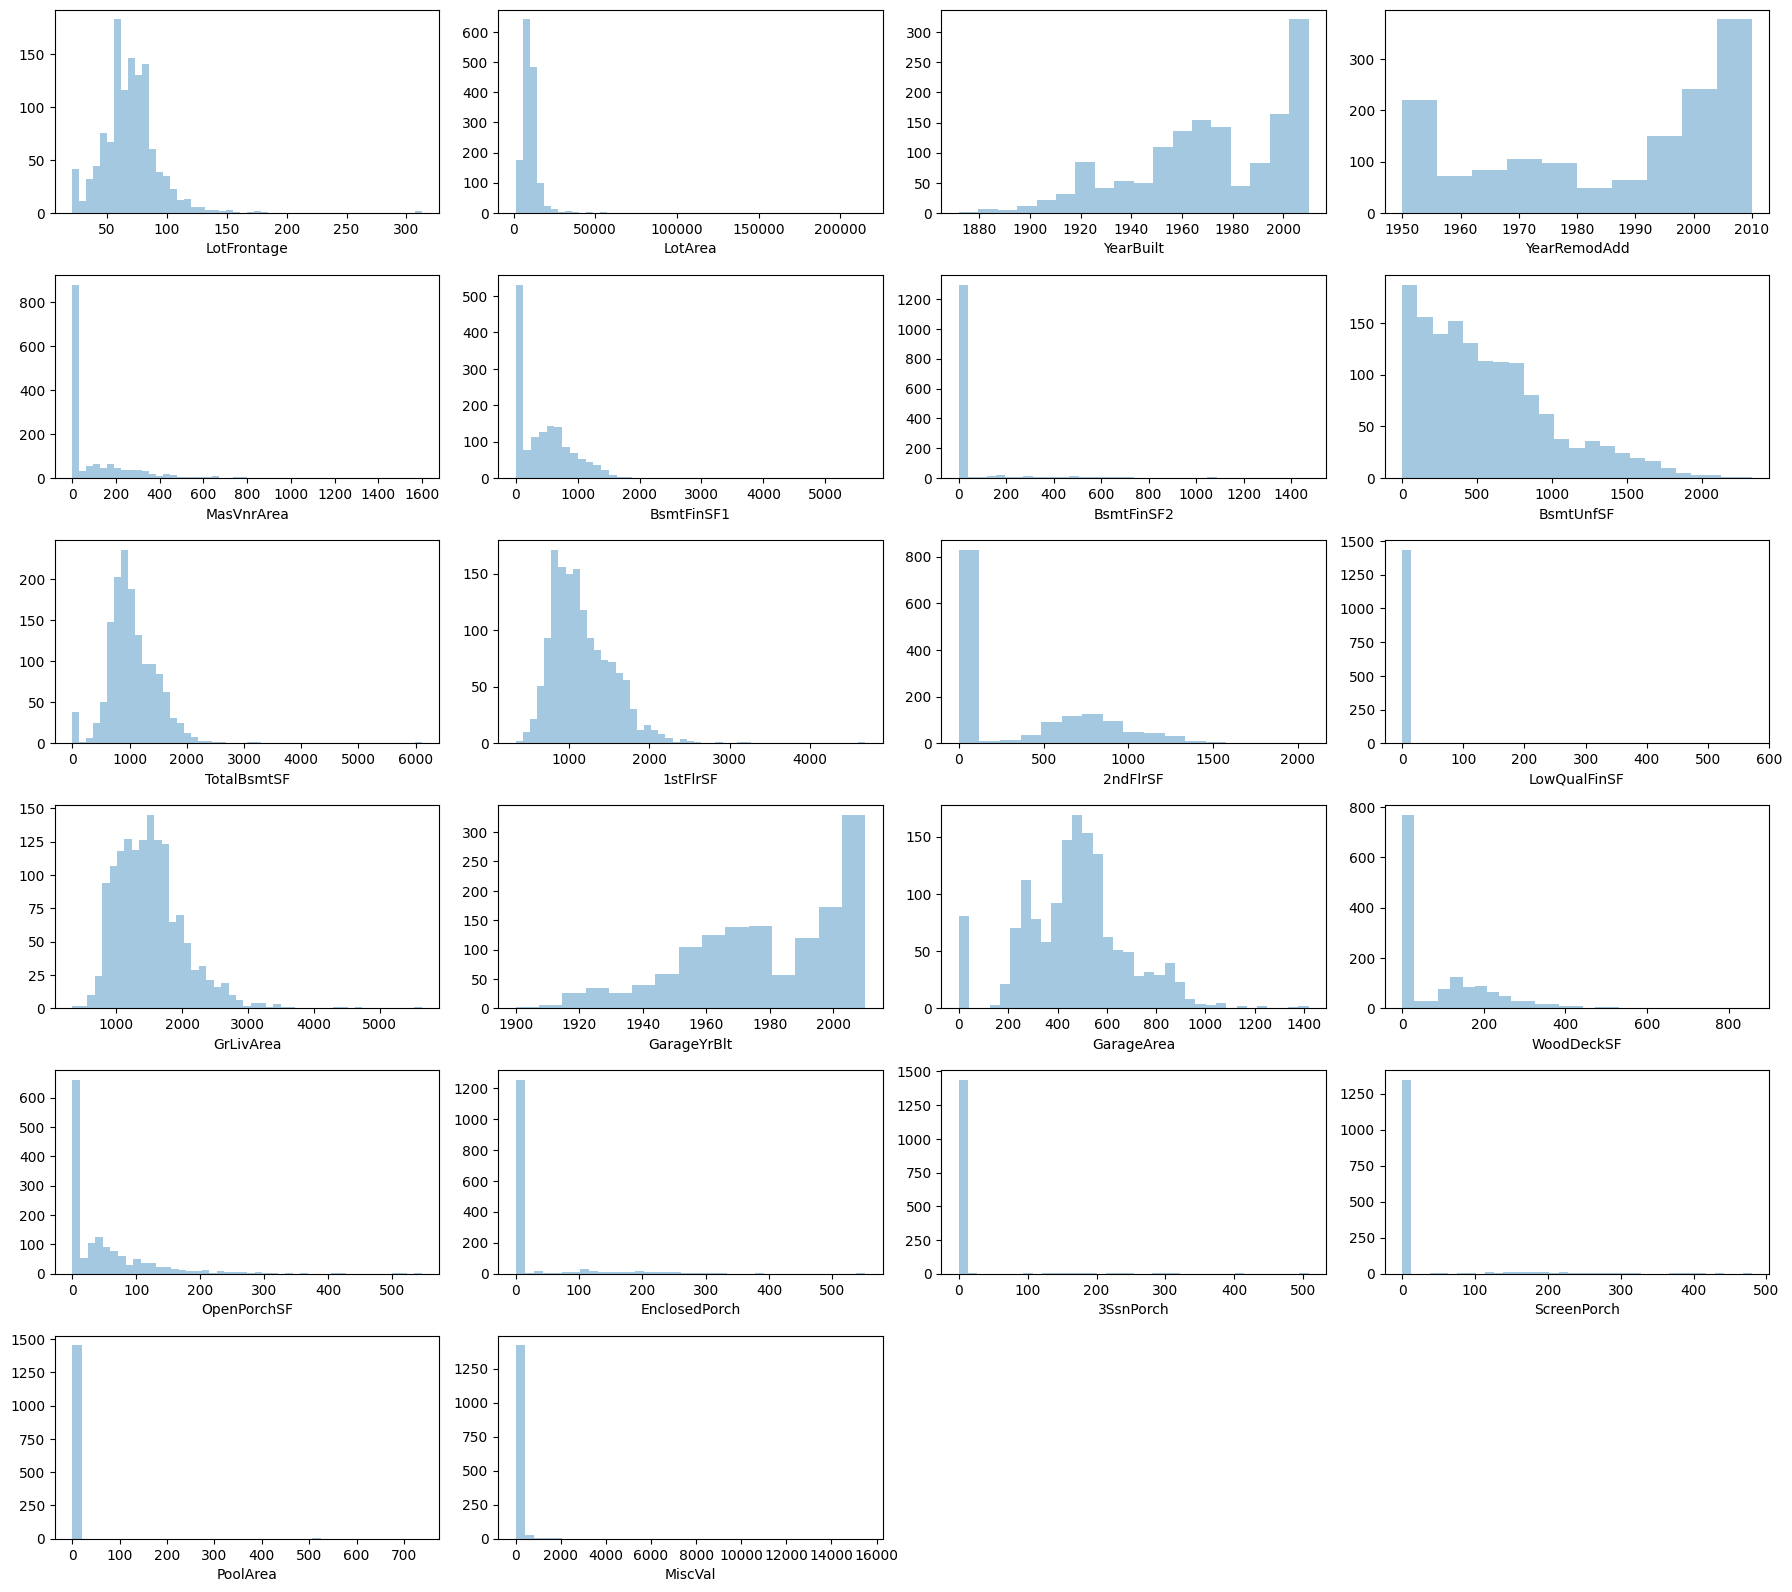

In [7]:
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(cont_num_var):
    plt.subplot(6,4,index+1)
    sns.distplot(numeric_.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

các biến với chỉ có 1 giá trị:
* BsmtFinSF2
* LowQualFinSF
* LowQualFinSF
* EnclosedPorch
* 3SsnPorch
* ScreenPorch
* PoolArea
* MiscVal

Các biến có cùng 1 giá trị như trên hầu như không đóng góp gì trong việc dự đoán, vì hầu như nhà nào cũng giống nhau, ví dụ như nhà nào cũng có mái vậy. Chính vì vậy chúng ta sẽ loại chúng đi

Phân bổ của các biến discrete

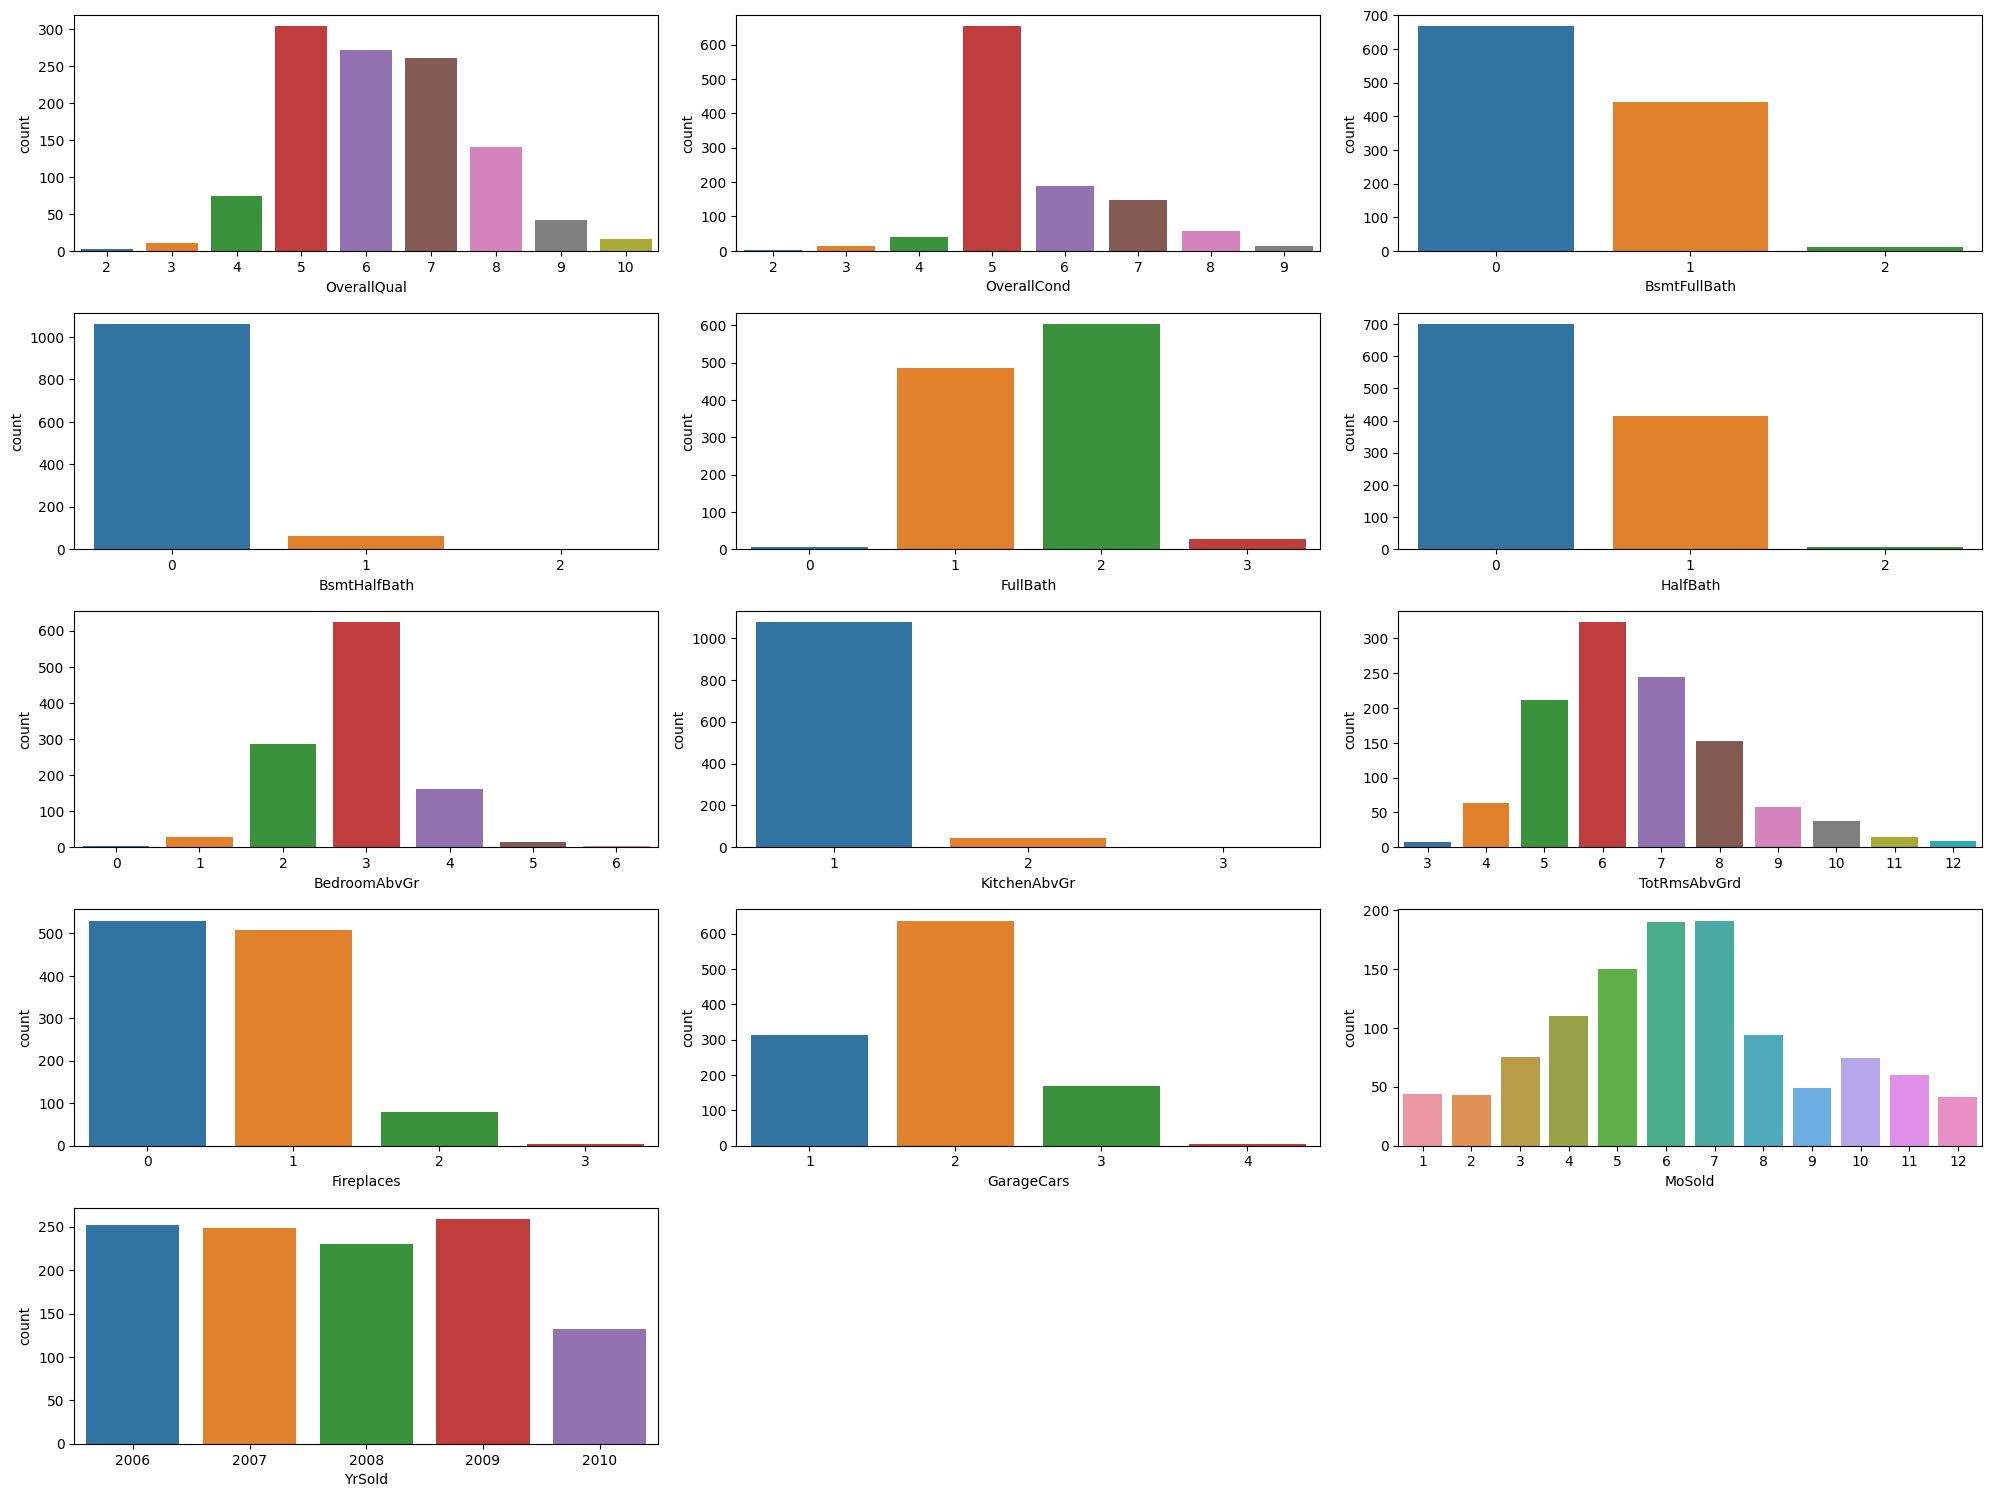

In [8]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(disc_num_var):
    plt.subplot(5,3,index+1)
    sns.countplot(x=col, data=numeric_.dropna())
fig.tight_layout(pad=1.0)

Phân bổ các biến categorical

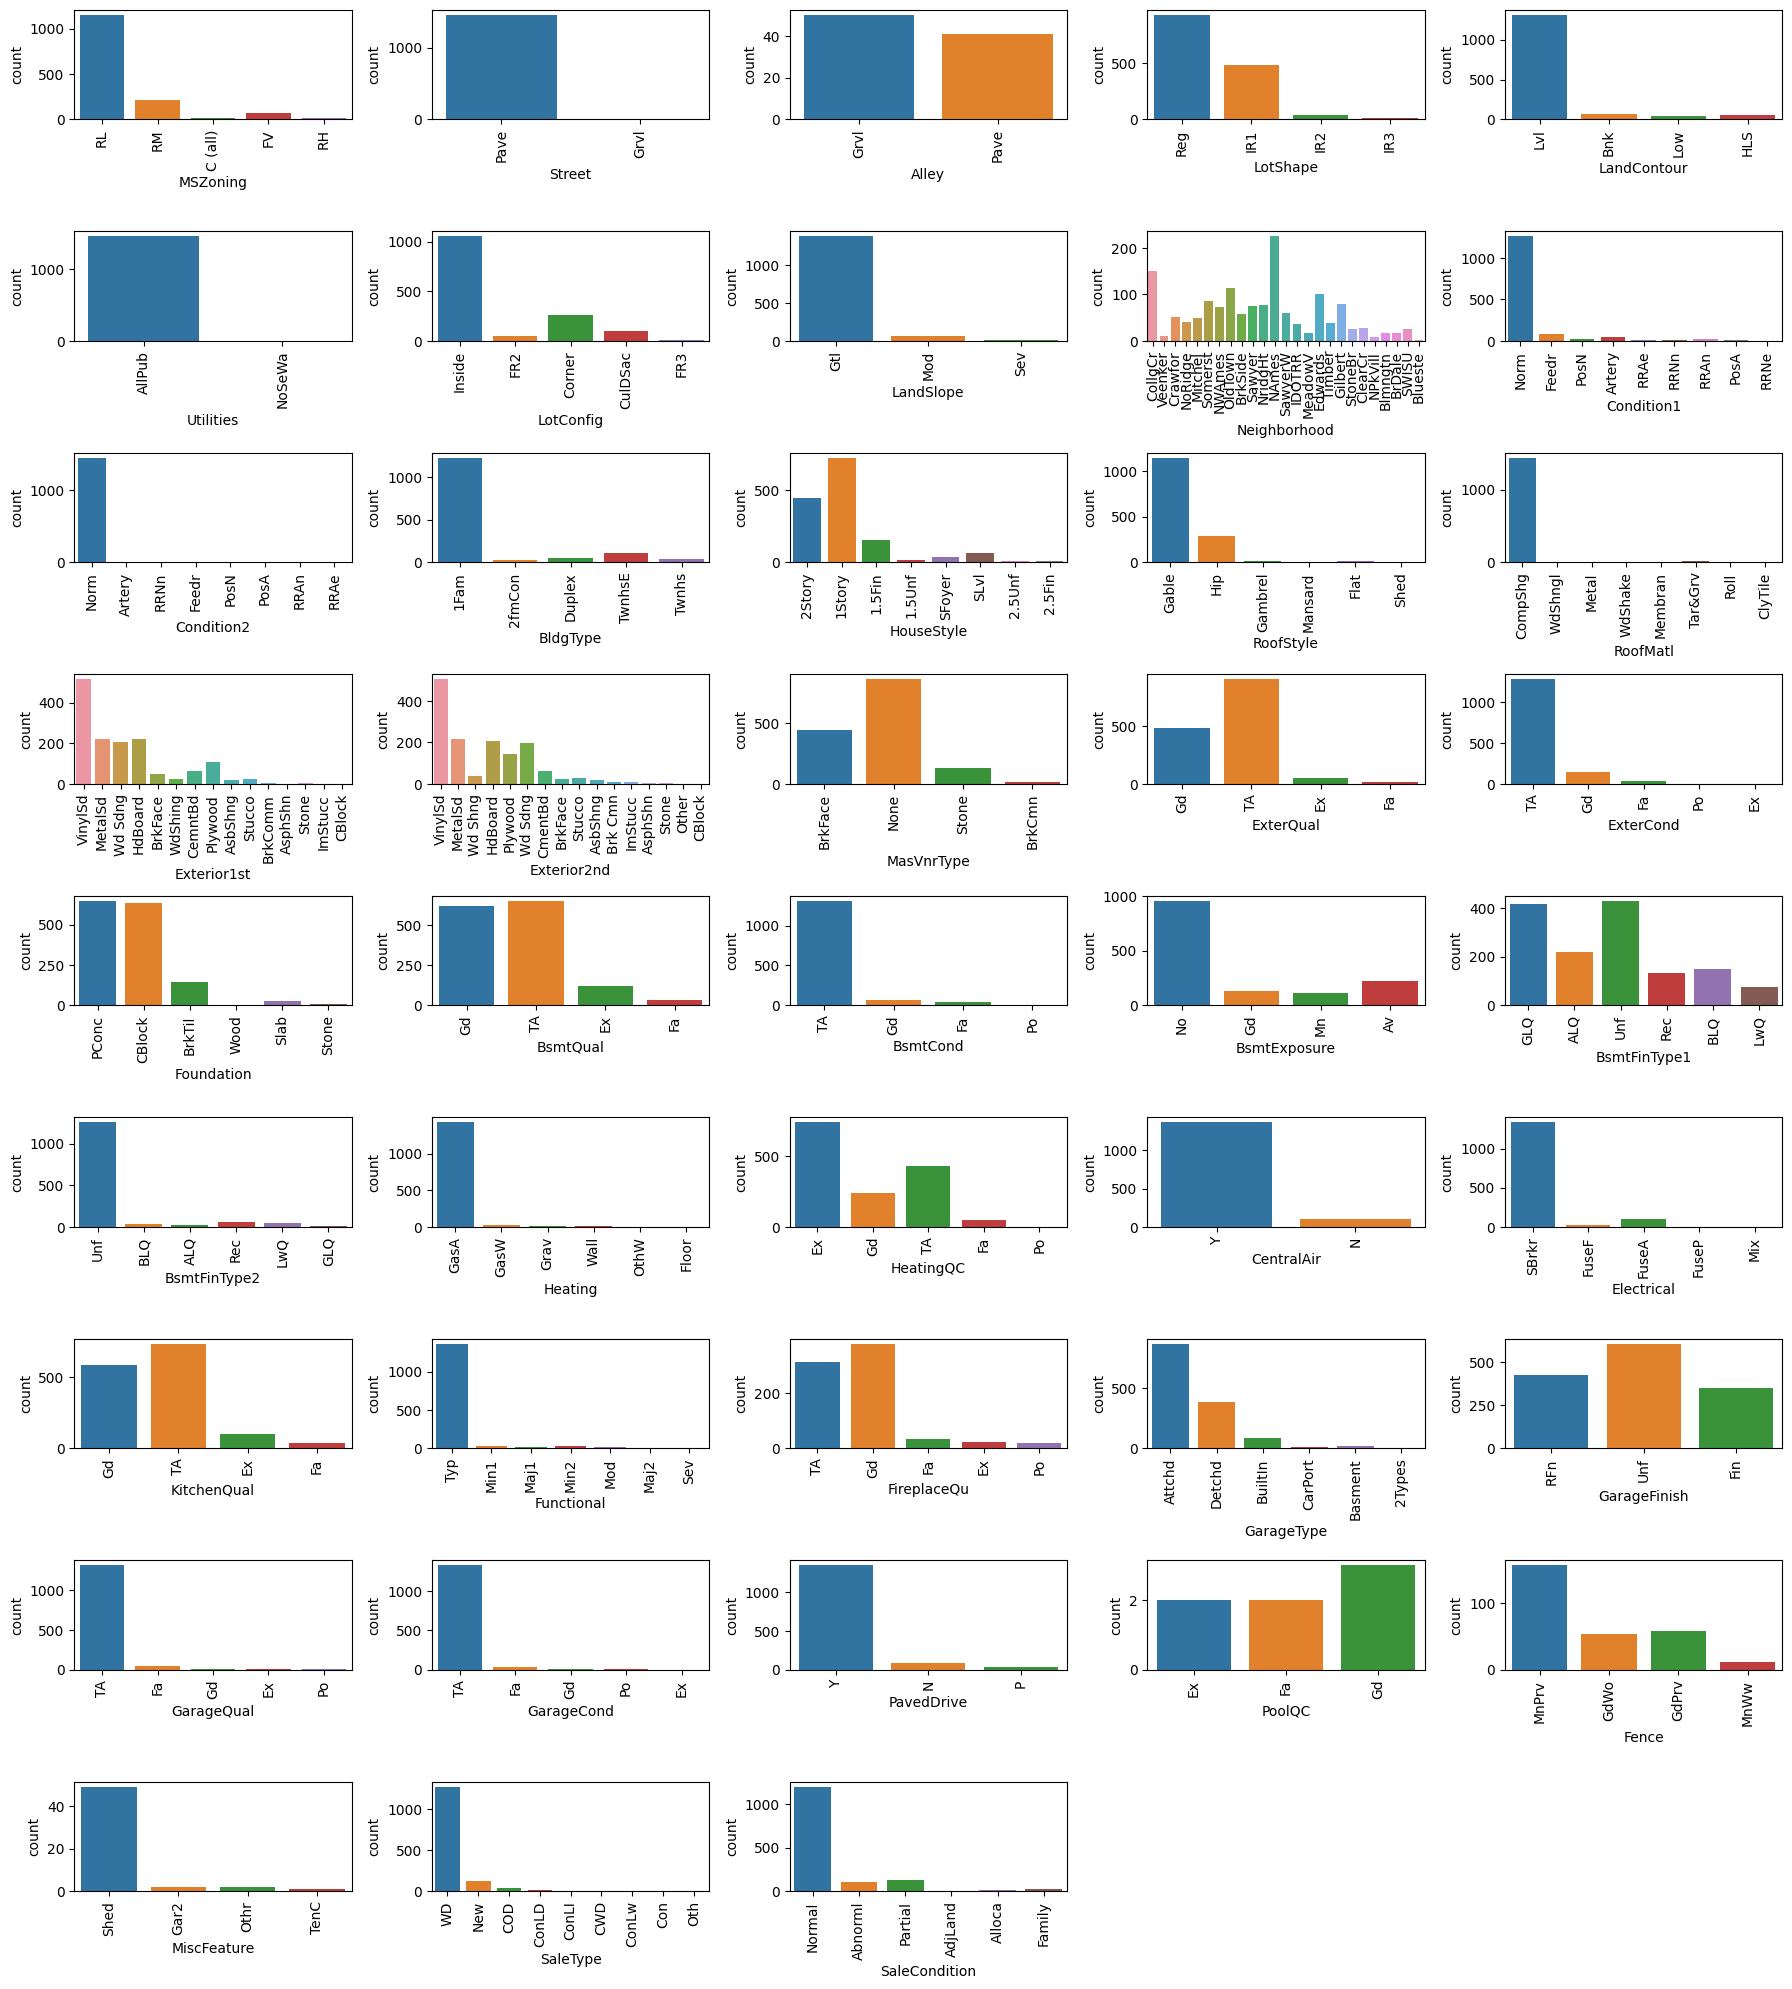

In [9]:
cat_train = train.select_dtypes(include=['object']).copy()
fig = plt.figure(figsize=(18,20))
for index in range(len(cat_train.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=cat_train.iloc[:,index], data=cat_train.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

Thêm một lần nữa, nhìn vào biến Condition2 và Ultilities, chúng ta thấy hầu như chúng chỉ mang 1 giá trị, chính vì vậy chúng ta không cần để chúng vào dữ liệu để train model

Correlation Matrix

<Axes: >

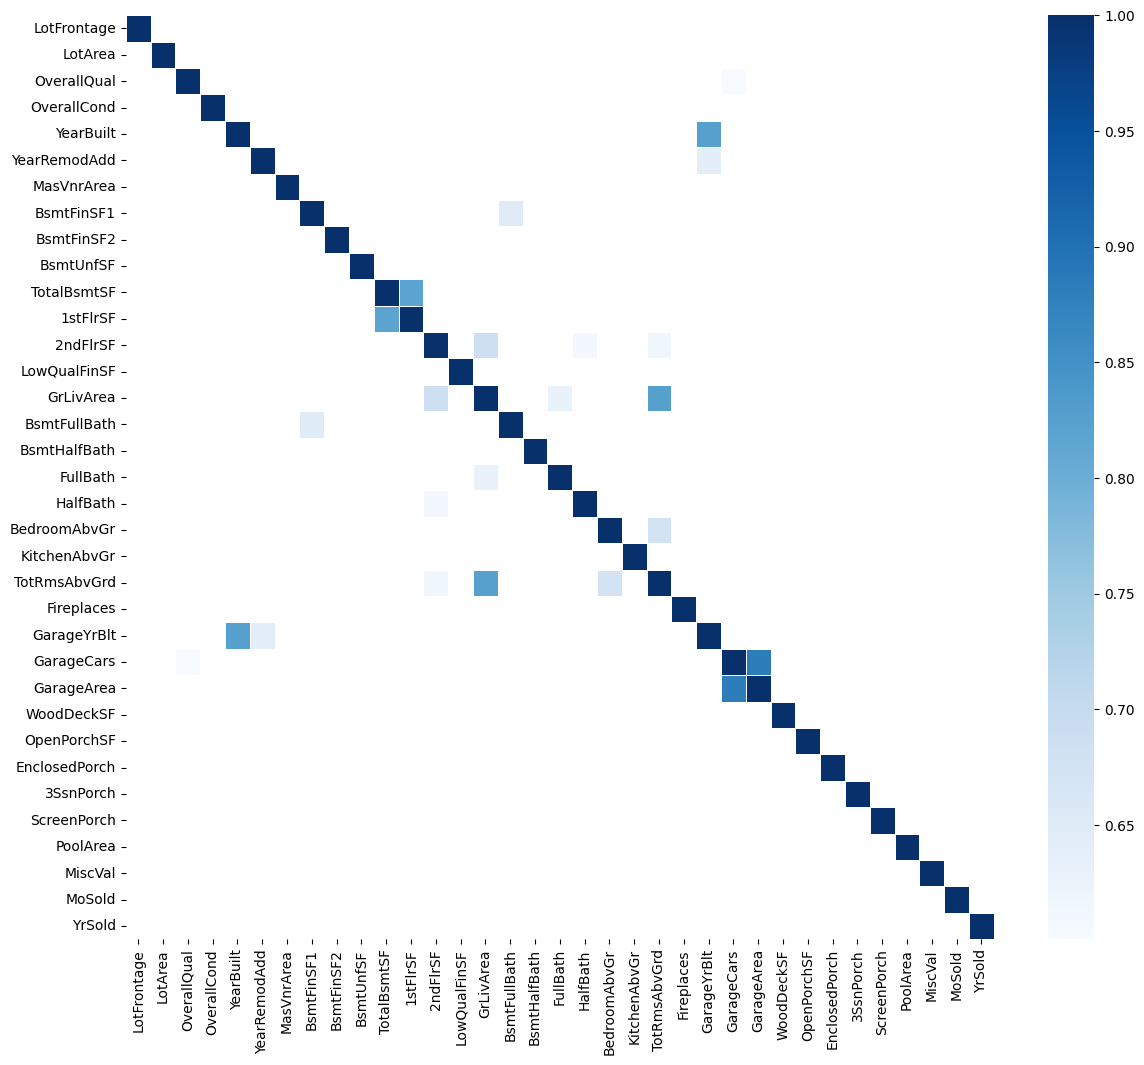

In [10]:
plt.figure(figsize=(14,12))
correlation = numeric_.corr()
sns.heatmap(correlation, mask = correlation < 0.6, linewidth=0.5, cmap='Blues')

Nhìn vào correlation, ta có thể thấy có một số biến có correlation khá cao, ví dụ như:
* GarageYrBlt and YearBuilt
* TotRmsAbvGrd and GrLivArea
* 1stFlrSF and TotalBsmtSF
* GarageArea and GarageCars

Chúng ta có thể loại bỏ chúng khi thực hiện xây dựng model

<Axes: title={'center': 'Number of missing rows'}, xlabel='features', ylabel='sum'>

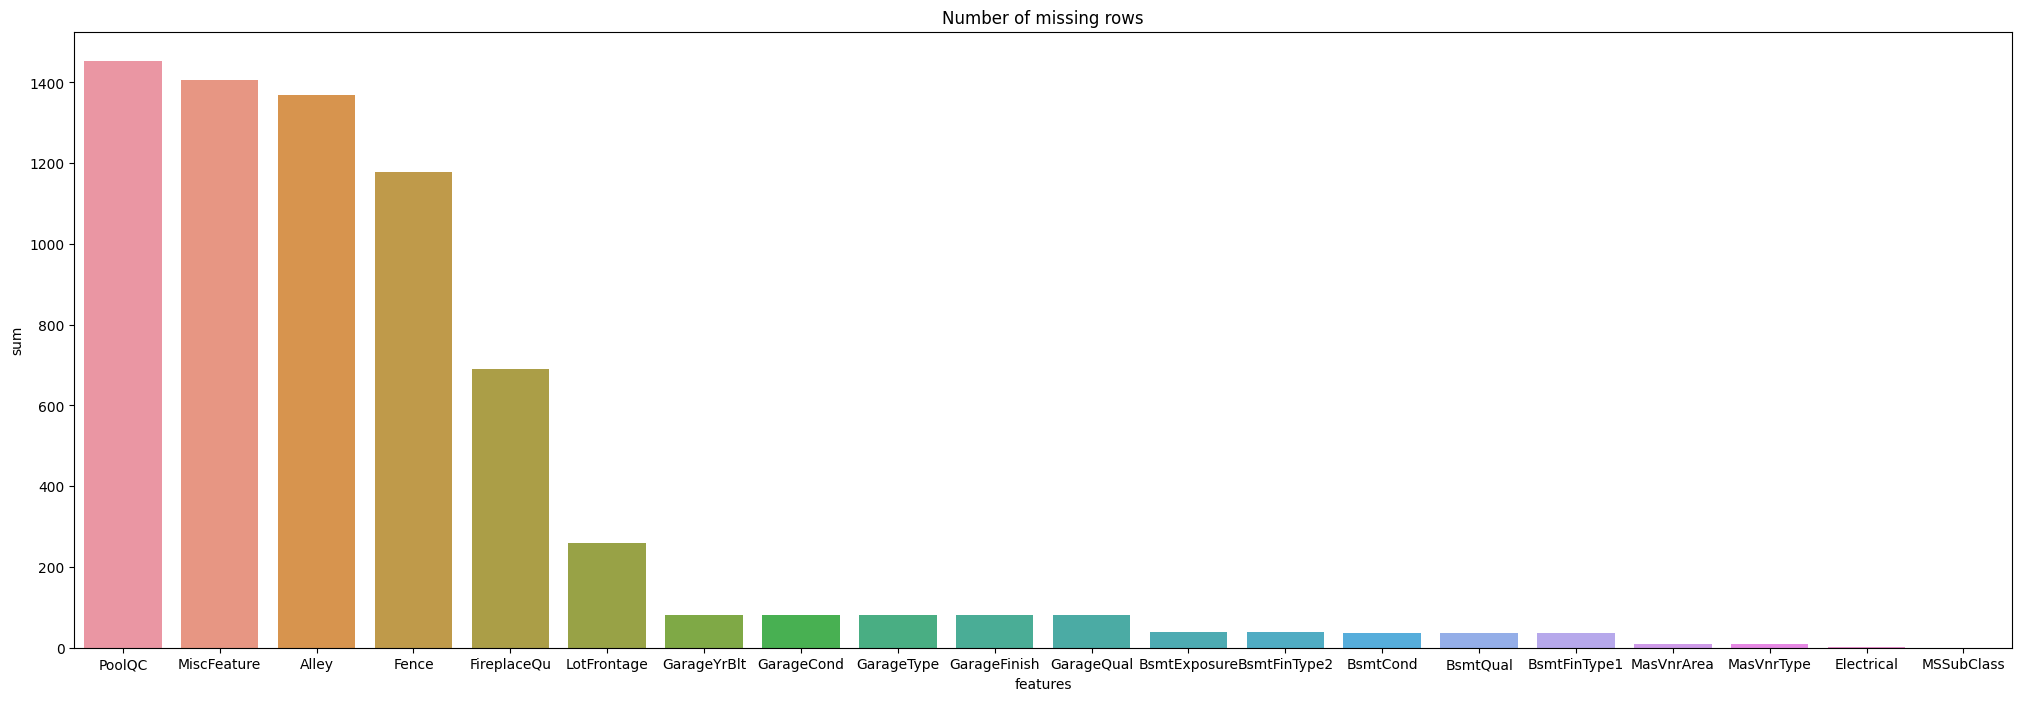

In [11]:
plt.figure(figsize=(25,8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(train.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(20).reset_index()
missing_count.columns = ['features','sum']
sns.barplot(x='features',y='sum', data = missing_count)

Nhìn vào dữ liệu, ta có thể thấy có 3 feature mà hầu hết đều thiếu, chúng đều là thông tin về các tính năng của 1 ngôi nhà. Tuy vậy, không phải nhà nào cũng có bể bơi, việc đường vào nhà được lát đá hay rải sỏi không có quá nhiều ảnh hưởng lên giá, hay có những tính năng đặc biệt thường không được thêm vào thông tin của giá nhà. Bên cạnh đó việc xử lý các trường thông tin còn thiếu như trên mang lại quá nhiều vấn đề, chính vì vậy chúng ta sẽ loại bỏ các trường thông tin này

# Data Inspection

In [12]:
train[train["Fireplaces"] == 0]
sum(train["MasVnrType"] != 0)

1460

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [15]:
def inspect_train(col:str = None):
    nan_cols = [i for i in train.columns if train[i].isnull().any()]
    temp = train[nan_cols]
    print(temp[col].unique())
    return temp[temp[col].isnull() == False]

def inspect_test(col:str = None):
    nan_cols = [i for i in test.columns if test[i].isnull().any()]
    temp = test[nan_cols]
    print(temp[col].unique())
    return temp[temp[col].isnull() == False]

In [16]:
inspect_train('Electrical')
# <Feature>: <num non-null>, <strategy>
# LotFrontage: 1201, Not Categorical -> Fill with mean or depends on other factors?
# Alley: 91, Fill with "None" since it doesn't have alley
# MasVnrType: 1452, Fill with "None"
# MasVnrArea: 1452, Depends on other factors?
# BsmtQual: 1423, fill with "NA", indicate no basement https://www.kaggle.com/c/home-data-for-ml-course/data
# BsmtCond: 1423, fill with "NA", indicate no basement https://www.kaggle.com/c/home-data-for-ml-course/data
# BsmtExposure: 1422, fill with "NA", indicate no basement https://www.kaggle.com/c/home-data-for-ml-course/data
# BsmtFinType1: 1423, fill with "NA", indicate no basement https://www.kaggle.com/c/home-data-for-ml-course/data
# BsmtFinType2: 1422 fill with "NA", indicate no basement https://www.kaggle.com/c/home-data-for-ml-course/data
# Electrical: 1459, i dont know, let it be standard i think
# FireplaceQu: 770, fill with "NA", indicate no fireplace, when Fireplaces have only 770 non-zero values https://www.kaggle.com/c/home-data-for-ml-course/data
# GarageType: 1379, fill with "NA", indicate no garage https://www.kaggle.com/c/home-data-for-ml-course/data
# GarageYrBlt: 1379, fill with "NA", indicate no garage https://www.kaggle.com/c/home-data-for-ml-course/data
# GarageFinish :1379, fill with "NA", indicate no garage https://www.kaggle.com/c/home-data-for-ml-course/data
# GarageQual: 1379, fill with "NA", indicate no garage https://www.kaggle.com/c/home-data-for-ml-course/data
# GarageCond: 1379, fill with "NA", indicate no garage https://www.kaggle.com/c/home-data-for-ml-course/data
# PoolQC: 7, fill with "NA", indicatte no pool, only 7 apartment have pool area > 0 https://www.kaggle.com/c/home-data-for-ml-course/data
# Fence: 281, fill with "NA", indicatte no fence https://www.kaggle.com/c/home-data-for-ml-course/data
# MiscFeature: 54,  fill with "NA", indicatte no other miscellaneous features https://www.kaggle.com/c/home-data-for-ml-course/data

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt GarageFinish GarageQual GarageCond PoolQC  Fence MiscFeature
Id                                                                                                                                                                                                                 
1            65.0   NaN    BrkFace       196.0       Gd       TA           No          GLQ          Unf      SBrkr         NaN     Attchd       2003.0          RFn         TA         TA    NaN    NaN         NaN
2            80.0   NaN       None         0.0       Gd       TA           Gd          ALQ          Unf      SBrkr          TA     Attchd       1976.0          RFn         TA         TA    NaN    NaN         NaN
3            68.0   NaN    BrkFace       162.0       Gd       TA           Mn          GLQ          Unf      SBrkr          TA     Attchd       2001.0          RFn         TA         TA    NaN    NaN         NaN
4            60.0   NaN       None         0.0       TA       Gd           No          ALQ          Unf      SBrkr          Gd     Detchd       1998.0          Unf         TA         TA    NaN    NaN         NaN
5            84.0   NaN    BrkFace       350.0       Gd       TA           Av          GLQ          Unf      SBrkr          TA     Attchd       2000.0          RFn         TA         TA    NaN    NaN         NaN
...           ...   ...        ...         ...      ...      ...          ...          ...          ...        ...         ...        ...          ...          ...        ...        ...    ...    ...         ...
1456         62.0   NaN       None         0.0       Gd       TA           No          Unf          Unf      SBrkr          TA     Attchd       1999.0          RFn         TA         TA    NaN    NaN         NaN
1457         85.0   NaN      Stone       119.0       Gd       TA           No          ALQ          Rec      SBrkr          TA     Attchd       1978.0          Unf         TA         TA    NaN  MnPrv         NaN
1458         66.0   NaN       None         0.0       TA       Gd           No          GLQ          Unf      SBrkr          Gd     Attchd       1941.0          RFn         TA         TA    NaN  GdPrv        Shed
1459         68.0   NaN       None         0.0       TA       TA           Mn          GLQ          Rec      FuseA         NaN     Attchd       1950.0          Unf         TA         TA    NaN    NaN         NaN
1460         75.0   NaN       None         0.0       TA       TA           No          BLQ          LwQ      SBrkr         NaN     Attchd       1965.0          Fin         TA         TA    NaN    NaN         NaN

[1459 rows x 19 columns]

## Data Preprocessing

In [17]:
# loại các biến có correlation cao
train.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)
test.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

# Drop các biến không có giá trị
train.drop(['PoolQC','MiscFeature','Alley', 'Utilities', 'Condition2'], axis=1, inplace=True)
test.drop(['PoolQC','MiscFeature','Alley', 'Utilities', 'Condition2'], axis=1, inplace=True)


In [18]:
# ordinal
ord = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']

train[ord] = train[ord].fillna("NA")
test[ord] = test[ord].fillna("NA")

# categorical
cats = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
train[cats] = train.groupby("Neighborhood")[cats].transform(lambda x: x.fillna(x.mode()[0]))
test[cats] = test.groupby("Neighborhood")[cats].transform(lambda x: x.fillna(x.mode()[0]))

# continuous
cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
train[cont] = train[cont] = train[cont].fillna(train[cont].mean())
test[cont] = test[cont] = test[cont].fillna(test[cont].mean())


In [19]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [20]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    train[col] = train[col].map(ordinal_map)
    test[col] = test[col].map(ordinal_map)

fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    train[col] = train[col].map(fintype_map)
    test[col] = test[col].map(fintype_map)


train['BsmtExposure'] = train['BsmtExposure'].map(expose_map)
train['Fence'] = train['Fence'].map(fence_map)

test['BsmtExposure'] = test['BsmtExposure'].map(expose_map)
test['Fence'] = test['Fence'].map(fence_map)


In [21]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
train['GarageArea'] = train.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
train['MSZoning'] = train.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

test['LotFrontage'] = test.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
test['GarageArea'] = test.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
test['MSZoning'] = test.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))


Nhìn vào dữ liệu, ta có thể thấy có một vài variable có thể được kết hợp để tạo ra các feature mới mà không gây mất mát thông tin. Ví dụ:

* TotalLot = LotFrontage + LotArea | the total area of land available
* TotalSF = TotalBsmtSF + 2ndFlrSF | the total surface area of the house
* TotalBath = FullBath + HalfBath  | the total bathrooms
* TotalPorch = OpenPorchSF + EnclosedPorch + ScreenPorch | total porch area
* TotalBsmtFin = BsmtFinSF1 + BsmtFinSF2 | total basement 



In [22]:
train['TotalLot'] = train['LotFrontage'] + train['LotArea']
train['TotalBsmtFin'] = train['BsmtFinSF1'] + train['BsmtFinSF2']
train['TotalSF'] = train['TotalBsmtSF'] + train['2ndFlrSF']
train['TotalBath'] = train['FullBath'] + train['HalfBath']
train['TotalPorch'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['ScreenPorch']

test['TotalLot'] = test['LotFrontage'] + test['LotArea']
test['TotalBsmtFin'] = test['BsmtFinSF1'] + test['BsmtFinSF2']
test['TotalSF'] = test['TotalBsmtSF'] + test['2ndFlrSF']
test['TotalBath'] = test['FullBath'] + test['HalfBath']
test['TotalPorch'] = test['OpenPorchSF'] + test['EnclosedPorch'] + test['ScreenPorch']

In [23]:
# Binary col
bin_cols = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']
for col in bin_cols:
    col_name = col+'_bin'
    train[col_name] = train[col].apply(lambda x: 1 if x > 0 else 0)
    test[col_name] = test[col].apply(lambda x: 1 if x > 0 else 0)

drop_cols = ["LotFrontage", "LotArea", "BsmtFinSF1", "BsmtFinSF2",
            "TotalBsmtSF", "2ndFlrSF", "FullBath", "HalfBath", 
            "OpenPorchSF", "EnclosedPorch", "ScreenPorch"]

drop_cols = list(set(drop_cols + bin_cols))

train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 67 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   Street            1460 non-null   object 
 3   LotShape          1460 non-null   object 
 4   LandContour       1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   LandSlope         1460 non-null   object 
 7   Neighborhood      1460 non-null   object 
 8   Condition1        1460 non-null   object 
 9   BldgType          1460 non-null   object 
 10  HouseStyle        1460 non-null   object 
 11  OverallQual       1460 non-null   int64  
 12  OverallCond       1460 non-null   int64  
 13  YearBuilt         1460 non-null   int64  
 14  YearRemodAdd      1460 non-null   int64  
 15  RoofStyle         1460 non-null   object 
 16  RoofMatl          1460 non-null   object 


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 66 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1459 non-null   int64  
 1   MSZoning          1459 non-null   object 
 2   Street            1459 non-null   object 
 3   LotShape          1459 non-null   object 
 4   LandContour       1459 non-null   object 
 5   LotConfig         1459 non-null   object 
 6   LandSlope         1459 non-null   object 
 7   Neighborhood      1459 non-null   object 
 8   Condition1        1459 non-null   object 
 9   BldgType          1459 non-null   object 
 10  HouseStyle        1459 non-null   object 
 11  OverallQual       1459 non-null   int64  
 12  OverallCond       1459 non-null   int64  
 13  YearBuilt         1459 non-null   int64  
 14  YearRemodAdd      1459 non-null   int64  
 15  RoofStyle         1459 non-null   object 
 16  RoofMatl          1459 non-null   objec

# Models fitting with gridsearch

In [26]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
y = train.SalePrice
X = train.drop("SalePrice", axis=1)

In [28]:
any(X.select_dtypes(include='object').columns == test.select_dtypes(include='object').columns)

True

In [29]:
for col in X.select_dtypes(include='object').columns:
    print(col)
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    test[col] = le.transform(test[col])

MSZoning
Street
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Foundation
Heating
CentralAir
Electrical
Functional
GarageType
GarageFinish
PavedDrive
SaleType
SaleCondition


In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
param_grid = {"n_estimators": [50,100,200,500],
              "max_depth": [None, 5,7,15,20],
              "min_samples_split": [2,3,4],
              "min_samples_leaf": [1,2,3,4],
              "max_features": ["sqrt", "log2"],
              "n_jobs": [-1],
              }

In [32]:
grid = GridSearchCV(
    RandomForestRegressor(), 
    param_grid, 
    refit = True, 
    scoring = 'neg_root_mean_squared_error',
    verbose = 10, 
    cv=2)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_val)

Fitting 2 folds for each of 480 candidates, totalling 960 fits
[CV 1/2; 1/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 1/2; 1/480] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=-31745.877 total time=   1.1s
[CV 2/2; 1/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 2/2; 1/480] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=-29252.954 total time=   0.1s
[CV 1/2; 2/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1
[CV 1/2; 2/480] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1;, score=-31767.539 total time=   0.2s
[CV 2/2; 2/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, 

In [33]:
# print regression report with GridSearchCV
print("mean_squared_error: ",mean_squared_error(grid_predictions,y_val, squared=False))
print("mean_absolute_error: ",mean_absolute_error(grid_predictions,y_val))

mean_squared_error:  34960.223319795834
mean_absolute_error:  17821.39067594474


In [34]:
grid = GridSearchCV(
    RandomForestRegressor(), 
    param_grid, 
    refit = True, 
    scoring = 'neg_mean_absolute_error',
    verbose = 10, 
    cv=2)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_val)

Fitting 2 folds for each of 480 candidates, totalling 960 fits
[CV 1/2; 1/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 1/2; 1/480] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=-18463.062 total time=   0.1s
[CV 2/2; 1/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 2/2; 1/480] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=-17775.662 total time=   0.3s
[CV 1/2; 2/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1
[CV 1/2; 2/480] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1;, score=-17881.102 total time=   0.2s
[CV 2/2; 2/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, 

In [35]:
# print regression report with GridSearchCV
print("mean_squared_error: ",mean_squared_error(grid_predictions,y_val, squared=False))
print("mean_absolute_error: ",mean_absolute_error(grid_predictions,y_val))

mean_squared_error:  35473.69401486063
mean_absolute_error:  17499.458226399536


In [36]:
grid = GridSearchCV(
    RandomForestRegressor(), 
    param_grid, 
    refit = True, 
    scoring = 'neg_mean_absolute_percentage_error',
    verbose = 10, 
    cv=2)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_val)

Fitting 2 folds for each of 480 candidates, totalling 960 fits
[CV 1/2; 1/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 1/2; 1/480] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=-0.109 total time=   0.1s
[CV 2/2; 1/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1
[CV 2/2; 1/480] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=-0.104 total time=   0.1s
[CV 1/2; 2/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1
[CV 1/2; 2/480] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1;, score=-0.108 total time=   0.2s
[CV 2/2; 2/480] START max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_

In [37]:
# print regression report with GridSearchCV
print("root mean squared error: ",mean_squared_error(grid_predictions,y_val, squared=False))
print("mean absolute error: ",mean_absolute_error(grid_predictions,y_val))

root mean squared error:  35637.32290330237
mean absolute error:  17813.665034246573
